In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import preprocessing

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

C:\Users\Saurabh Salunkhe\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Logistic Regression Assumptions:

### 1. Data should be free of missing values
### 2. The predictant variable is binary or categorical(a categorical variable with ordered values)
### 3. All predictors are independent of each other

In [3]:
# Loading the data into dataframe
mtcars=pd.read_csv('mtcars.csv')

In [4]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
mtcars.shape

(32, 12)

In [6]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [7]:
# Lets check for missing values
mtcars.isnull().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

### So there are no missing values in the data 
### Lets check wheter the target variable is binary(or categorical)

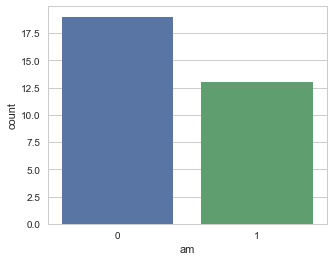

In [8]:
# So there are no missing values in the data 
# Lets check wheter the target variable is binary(or categorical)
sb.countplot(mtcars['am'])

### Thus, we can conclude that our target variable is binary
### Now, lets check if the variables are collinear
### For that, we will use spearmanr coefficient

In [9]:
# For our feature variables, we are going to use the drat and carb features

from scipy.stats import spearmanr
sex=mtcars['drat']
age=mtcars['carb']
# Spearman correlation is often used for non parametric methods whereas for parametric methods we use Pearson correlation
spearmanr_coefficient, p_value=spearmanr(sex,age)
print(spearmanr_coefficient, p_value)

-0.12522293992 0.494682402971


In [10]:
# From above, we can conclude that there is no corelation amongst the variables and hence we are good to go with our logistic model

In [11]:
X_feature=mtcars[['drat','carb']]

In [12]:
X_target=mtcars['am']

In [13]:
X_feature=scale(X_feature)

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_feature,X_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
score = model.score(X_feature,X_target)

In [17]:
print("The score of our logistic regression model is",score)

The score of our logistic regression model is 0.8125


In [18]:
# Now, that we have generated our model, lets generate the classification model
y_pred=model.predict(X_feature)
from sklearn.metrics import classification_report
print(classification_report(X_target,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.79      0.83        19
          1       0.73      0.85      0.79        13

avg / total       0.82      0.81      0.81        32



In [19]:
# Import the necessary module
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(model, X_feature, X_target, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# find the mean of our cv scores here
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.85714286  0.57142857  0.85714286  0.83333333  0.8       ]
Average 5-Fold CV Score: 0.7838095238095238
